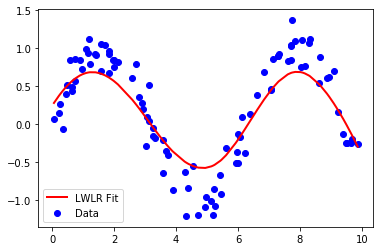

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def locally_weighted_regression(x, y, tau=0.1):
    """
    Performs Locally Weighted Linear Regression (LWLR) to fit data points.

    Parameters:
    x (numpy array): Input data points (1D).
    y (numpy array): Output data points (1D).
    tau (float): The bandwidth parameter that controls the locality. Smaller values make the model more sensitive to nearby points.
    
    Returns:
    numpy array: Predicted values.
    """
    
    m = len(x)
    predictions = np.zeros(m)
    
    # Add a bias term by appending 1's to the input data for the intercept
    X = np.c_[np.ones(m), x]
    
    for i in range(m):
        # Weights vector (diagonal matrix), where closer points have higher weights
        W = np.diag(np.exp(-(x - x[i]) ** 2 / (2 * tau ** 2)))
        
        # Solving the weighted least squares problem: (X.T @ W @ X) @ (X.T @ W @ y)
        theta = np.linalg.pinv(X.T @ W @ X) @ (X.T @ W @ y)
        
        # The prediction for the current point
        predictions[i] = X[i].dot(theta)
    
    return predictions

# Example usage:
if __name__ == "__main__":
    # Generate synthetic data for demonstration
    np.random.seed(42)
    x = np.sort(np.random.rand(100) * 10)  # 100 data points between 0 and 10
    y = np.sin(x) + np.random.normal(0, 0.2, len(x))  # Sinusoidal function with noise
    
    # Apply Locally Weighted Linear Regression
    tau = 1.0  # Bandwidth parameter
    predictions = locally_weighted_regression(x, y, tau)
    
    # Plotting the data and the fitted curve
    plt.scatter(x, y, label='Data', color='blue')
    plt.plot(x, predictions, label='LWLR Fit', color='red', linewidth=2)
    plt.legend()
    plt.show()
